# CSI ID : CT_CSI_DS_2346

In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import missingno as msno


# Attributes for both students data :




    - mat.csv (Math course) and student: por.csv (Portuguese language course) datasets:

    1.	school :  student's school (binary: "GP" :  Gabriel Pereira or "MS" :  Mousinho da Silveira)
    2.	sex :  student's sex (binary: "F" :  female or "M" :  male)
    3.	age :  student's age (numeric: from 15 to 22)
    4.	address :  student's home address type (binary: "U" :  urban or "R" :  rural)
    5.	famsize :  family size (binary: "LE3" :  less or equal to 3 or "GT3" :  greater than 3)
    6.	Pstatus :  parent's cohabitation status (binary: "T" :  living together or "A" :  apart)
    7.	Medu :  mother's education (numeric: 0 :  none,  1 :  primary education (4th grade), 2 : 5th to 9th grade, 3 : secondary education or 4: higher education)
    8.	Fedu :  father's education (numeric: 0 :  none,  1 :  primary education (4th grade), 2 : 5th to 9th grade, 3 : secondary education or 4 : higher education)
    9.	Mjob :  mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
    10.	Fjob :  father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
    11.	reason :  reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
    12.	guardian :  student's guardian (nominal: "mother", "father" or "other")
    13.	traveltime :  home to school travel time (numeric: 1 :  <15 min., 2 :  15 to 30 min., 3 :  30 min. to 1 hour, or 4 :  >1 hour)
    14.	studytime :  weekly study time (numeric: 1 :  <2 hours, 2 :  2 to 5 hours, 3 :  5 to 10 hours, or 4 :  >10 hours)
    15.	failures :  number of past class failures (numeric: n if 1<=n<3, else 4)
    16.	schoolsup :  extra educational support (binary: yes or no)
    17.	famsup :  family educational support (binary: yes or no)
    18.	paid :  extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    19.	activities :  extra: curricular activities (binary: yes or no)
    20.	nursery :  attended nursery school (binary: yes or no)
    21.	higher :  wants to take higher education (binary: yes or no)
    22.	internet :  Internet access at home (binary: yes or no)
    23.	romantic :  with a romantic relationship (binary: yes or no)
    24.	famrel :  quality of family relationships (numeric: from 1 :  very bad to 5 :  excellent)
    25.	freetime :  free time after school (numeric: from 1 :  very low to 5 :  very high)
    26.	goout :  going out with friends (numeric: from 1 :  very low to 5 :  very high)
    27.	Dalc :  workday alcohol consumption (numeric: from 1 :  very low to 5 :  very high)
    28.	Walc :  weekend alcohol consumption (numeric: from 1 :  very low to 5 :  very high)
    29.	health :  current health status (numeric: from 1 :  very bad to 5 :  very good)
    30.	absences :  number of school absences (numeric: from 0 to 93)

    Grade attributes:
    31.	G1 :  first period grade (numeric: from 0 to 20)
    32.	G2 :  second period grade (numeric: from 0 to 20)
    33.	G3 :  final grade (numeric: from 0 to 20, output target)

# Reading File

### -with help of pandas - using seprator - ';'

In [107]:
df_mat =pd.read_csv('/content/student-mat.csv',sep=';')
df_por =pd.read_csv('/content/student-por.csv',sep=';')

# Intial Inspecting of both files

In [108]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [109]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Merging of both datframes into one

In [110]:
df=pd.concat([df_mat, df_por], ignore_index=True)

# Inspecting of final dataframe

In [111]:
print('\n')
print("Number of row and columns in df","-"*80)
display(df.shape)
print('\n')
print('\n')
print("First five row of df","-"*80)
display(df.head())
print('\n')
print('\n')
print("Last five row of df","-"*80)
display(df.tail())
print('\n')
print('\n')
print("data type  of each values in df","-"*80)
display(df.dtypes)
print('\n')
print('\n')
print("Null values in df","-"*80)
display(df.isnull().sum())
print('\n')



Number of row and columns in df --------------------------------------------------------------------------------


(1044, 33)





First five row of df --------------------------------------------------------------------------------


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10






Last five row of df --------------------------------------------------------------------------------


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11






data type  of each values in df --------------------------------------------------------------------------------


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object





Null values in df --------------------------------------------------------------------------------


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

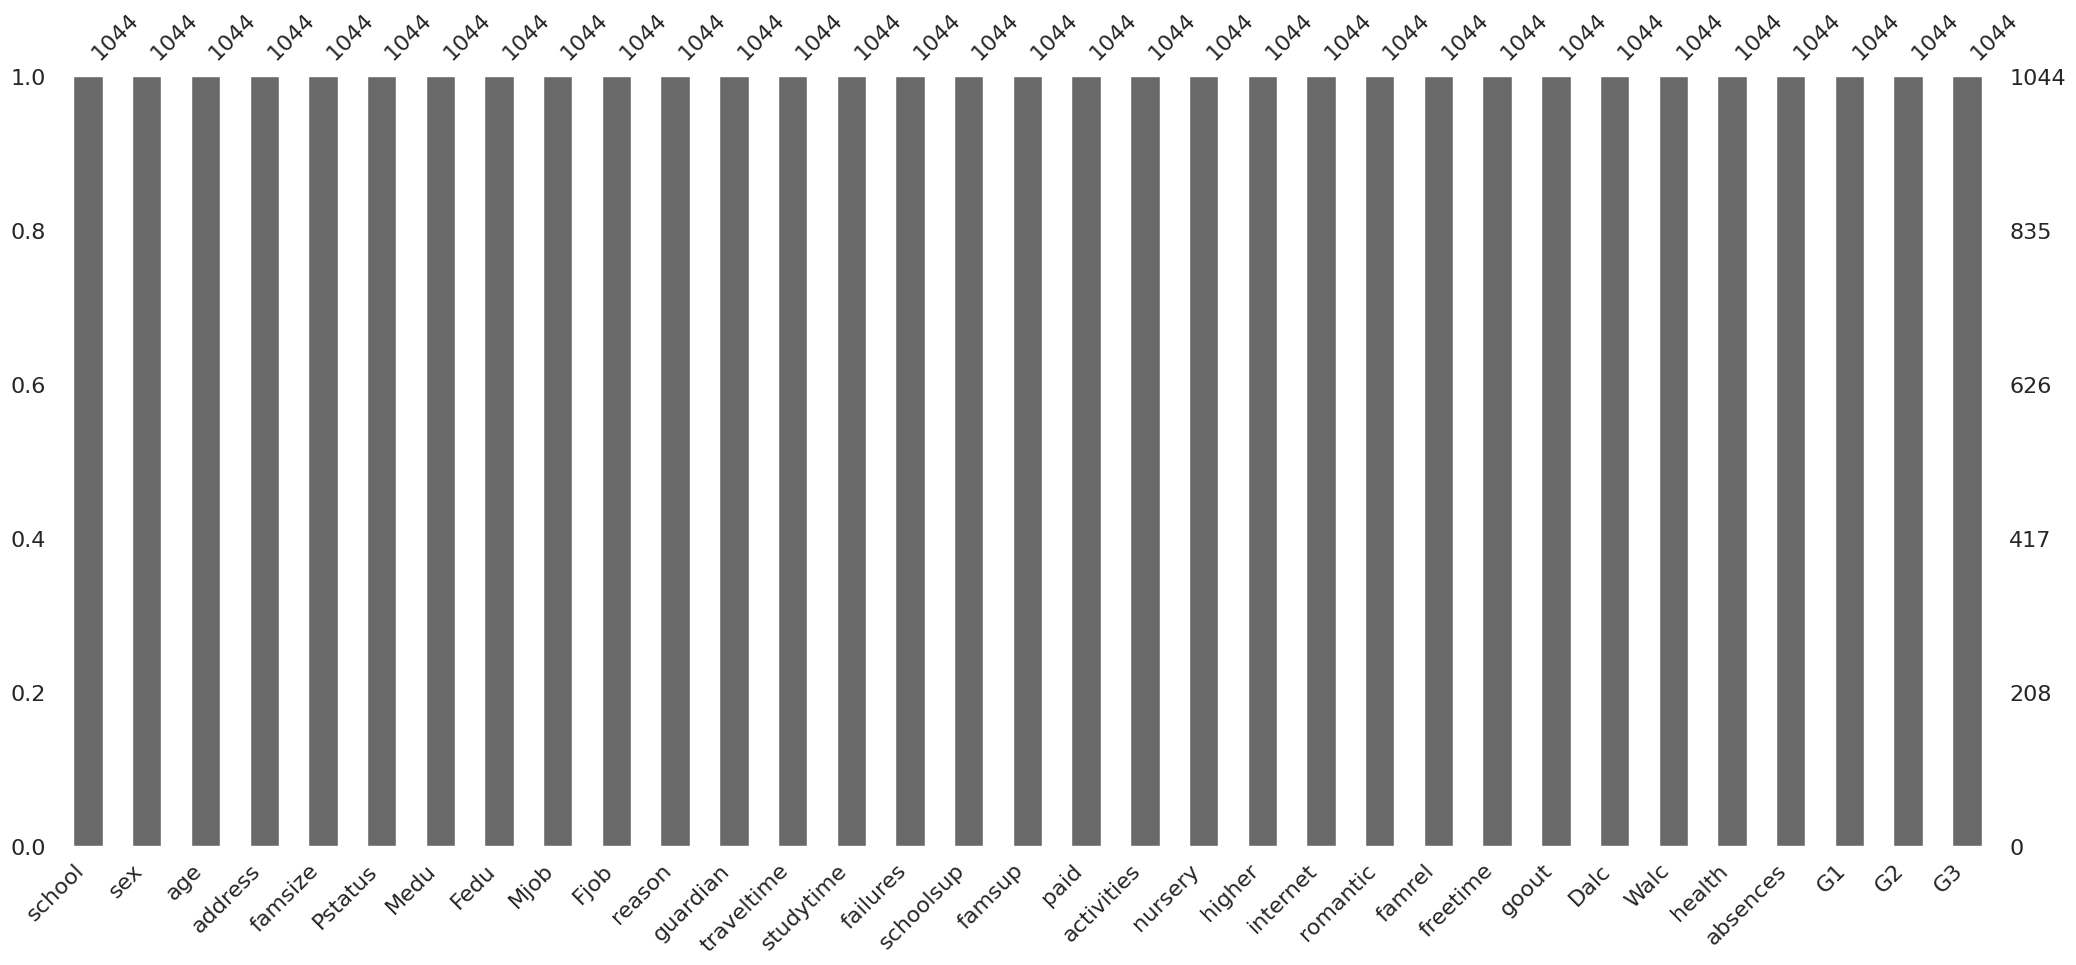

In [46]:
msno.bar(df);

## Chaging dtype into category

In [112]:
for col in['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health']:
    df[col] = df[col].astype('category')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      1044 non-null   category
 1   sex         1044 non-null   category
 2   age         1044 non-null   int64   
 3   address     1044 non-null   category
 4   famsize     1044 non-null   category
 5   Pstatus     1044 non-null   category
 6   Medu        1044 non-null   category
 7   Fedu        1044 non-null   category
 8   Mjob        1044 non-null   category
 9   Fjob        1044 non-null   category
 10  reason      1044 non-null   category
 11  guardian    1044 non-null   category
 12  traveltime  1044 non-null   category
 13  studytime   1044 non-null   category
 14  failures    1044 non-null   category
 15  schoolsup   1044 non-null   category
 16  famsup      1044 non-null   category
 17  paid        1044 non-null   category
 18  activities  1044 non-null   category
 19  nurser

In [114]:
result = df.select_dtypes(include='category')
for i in result:
    print(result[i].value_counts())
    print('\n')

school
GP    772
MS    272
Name: count, dtype: int64


sex
F    591
M    453
Name: count, dtype: int64


address
U    759
R    285
Name: count, dtype: int64


famsize
GT3    738
LE3    306
Name: count, dtype: int64


Pstatus
T    923
A    121
Name: count, dtype: int64


Medu
4    306
2    289
3    238
1    202
0      9
Name: count, dtype: int64


Fedu
2    324
1    256
3    231
4    224
0      9
Name: count, dtype: int64


Mjob
other       399
services    239
at_home     194
teacher     130
health       82
Name: count, dtype: int64


Fjob
other       584
services    292
teacher      65
at_home      62
health       41
Name: count, dtype: int64


reason
course        430
home          258
reputation    248
other         108
Name: count, dtype: int64


guardian
mother    728
father    243
other      73
Name: count, dtype: int64


traveltime
1    623
2    320
3     77
4     24
Name: count, dtype: int64


studytime
2    503
1    317
3    162
4     62
Name: count, dtype: int64


failures
0  

# Five point data summaries

In [115]:
df.describe(include="all").round().T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,1044,2,GP,772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1044,2,F,591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1044.0,NaN,NaN,NaN,17.0,1.0,15.0,16.0,17.0,18.0,22.0
address,1044,2,U,759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,1044,2,GT3,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,1044,2,T,923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,1044.0,5.0,4.0,306.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fedu,1044.0,5.0,2.0,324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mjob,1044,5,other,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,1044,5,other,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Univarate Analysis

-------------------------------------------------

## Distribution of Categotical Varriable

---------------------------------------------

In [116]:
plt.rcParams.update({'figure.max_open_warning': 0})

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

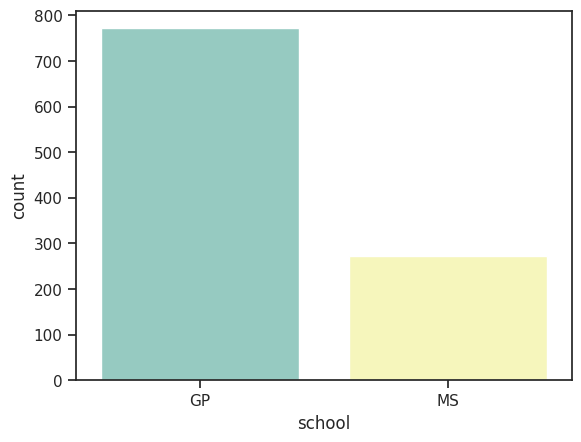

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

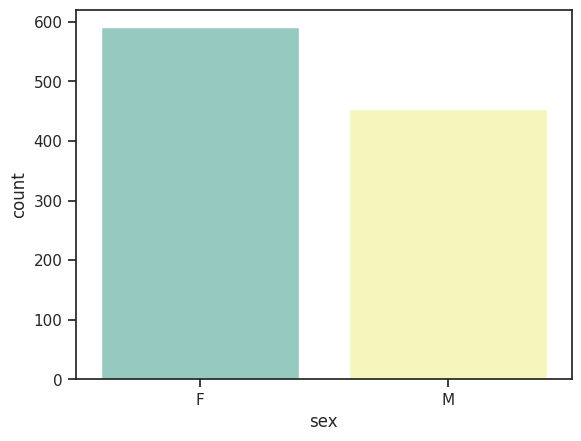

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

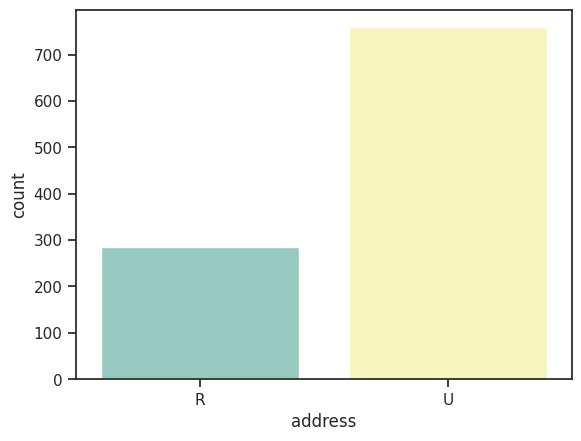

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

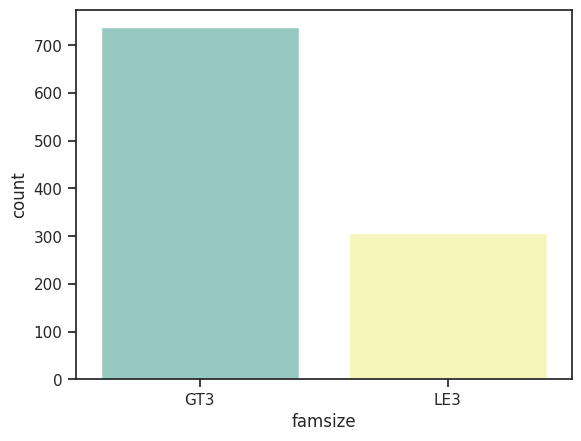

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

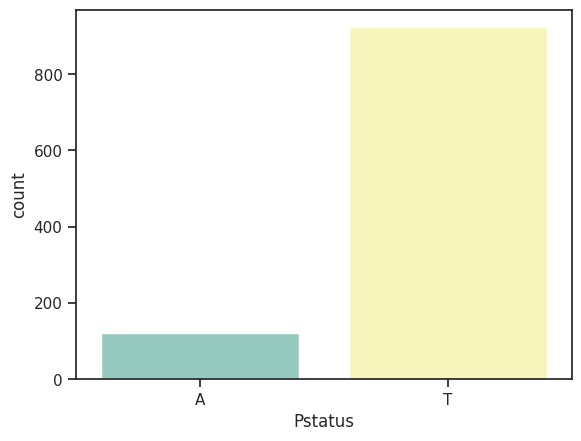

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

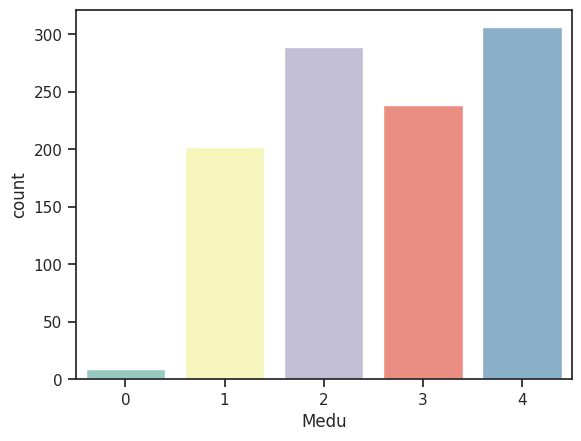

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

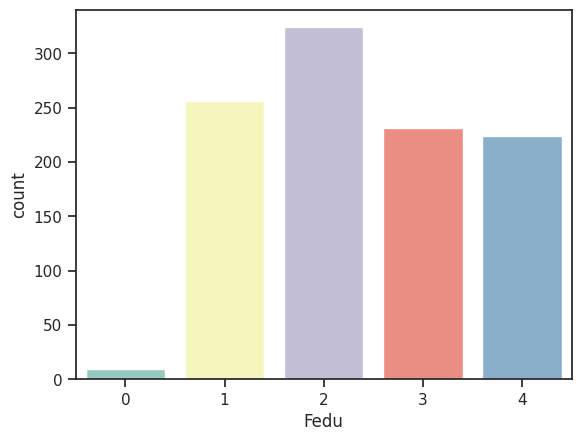

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

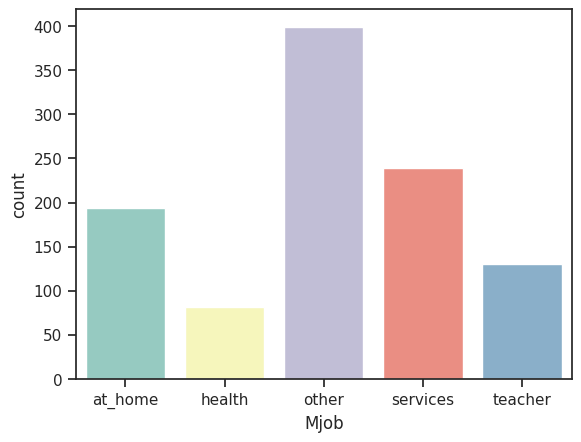

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

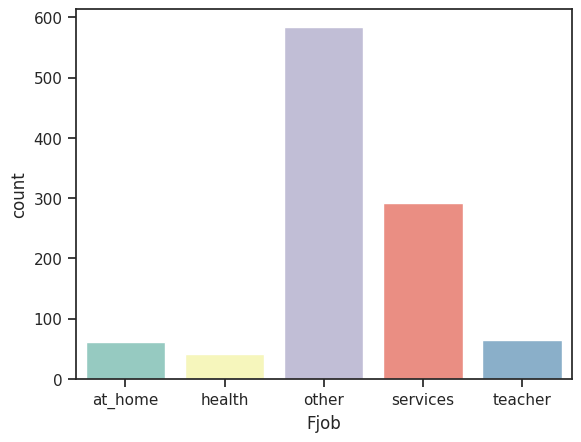

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

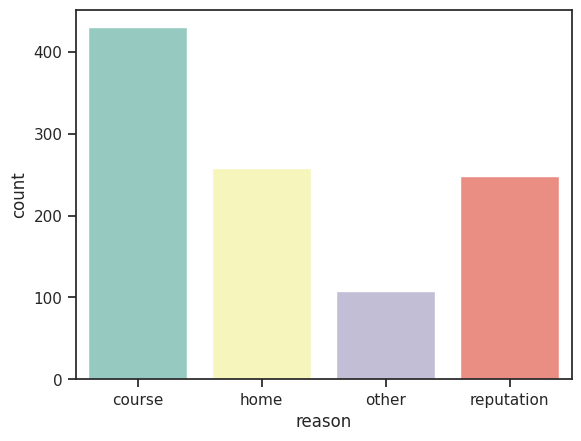

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

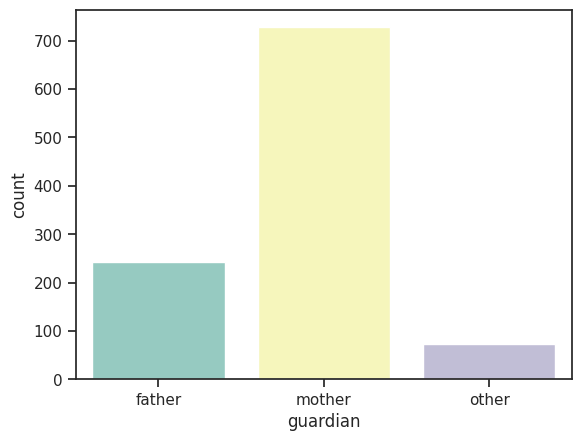

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

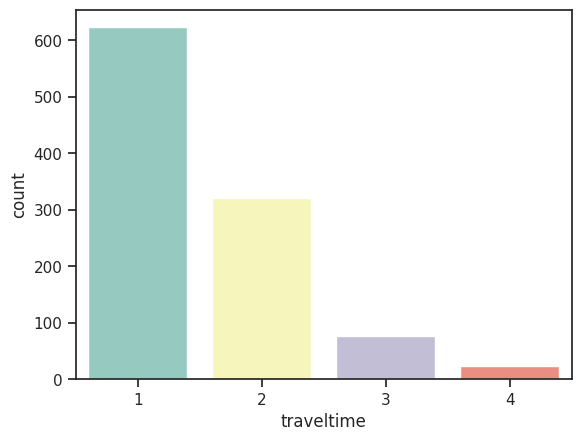

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

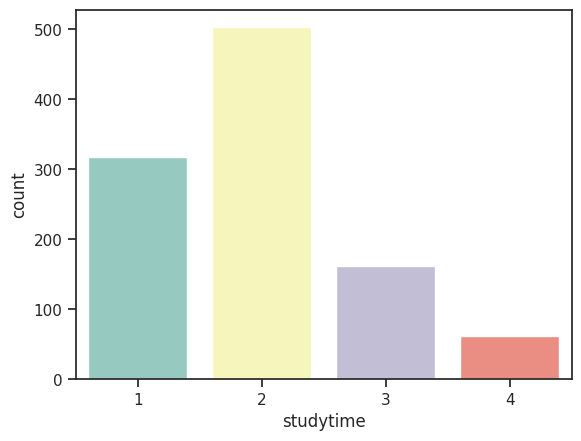

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

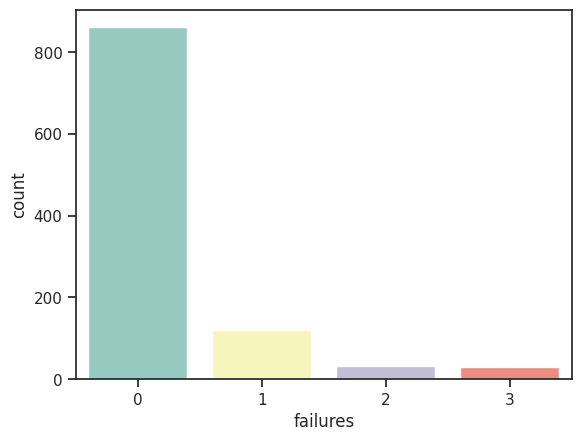

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

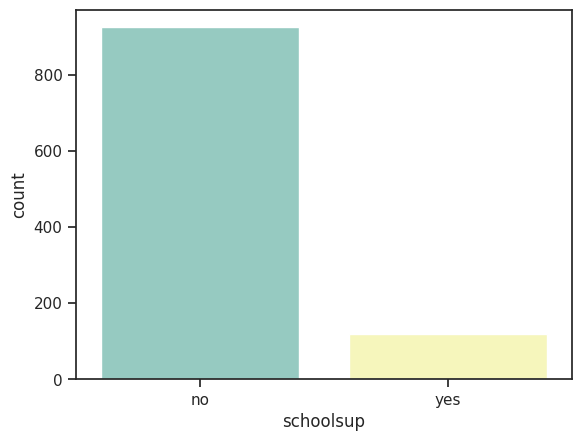

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

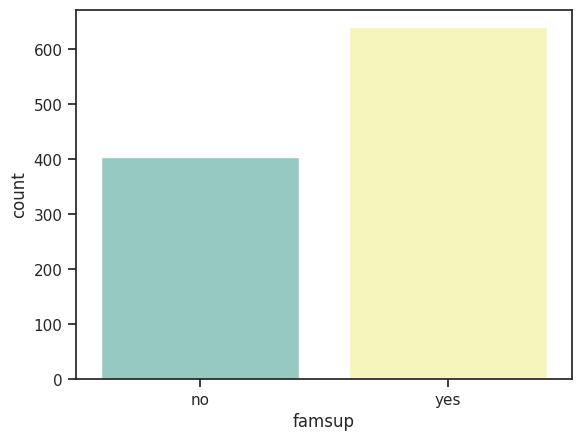

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

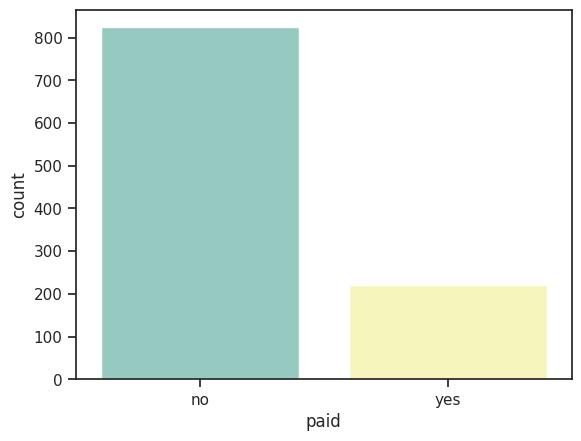

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

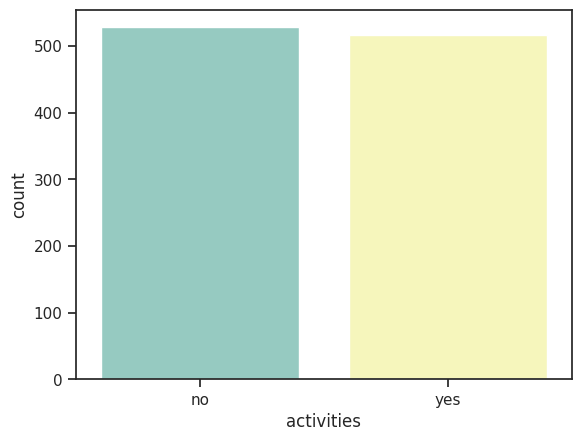

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

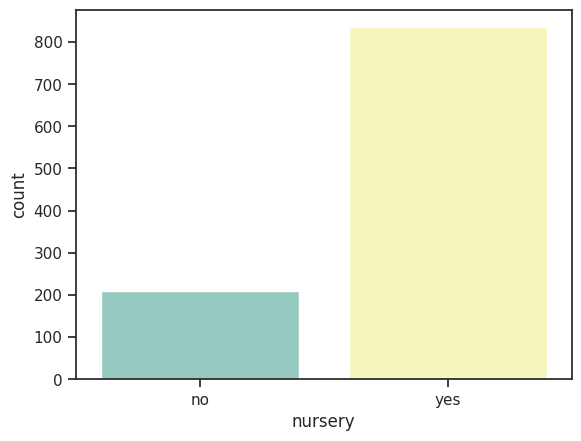

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

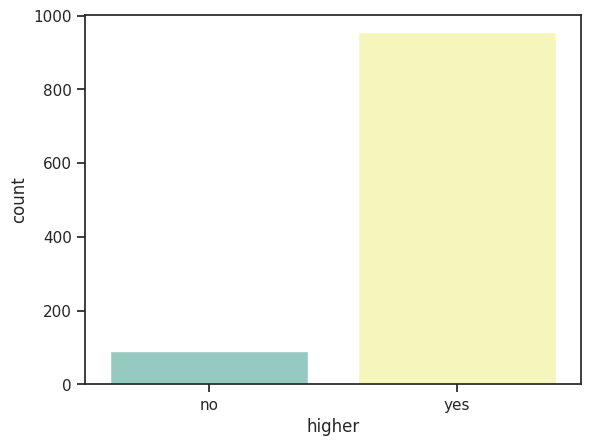

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

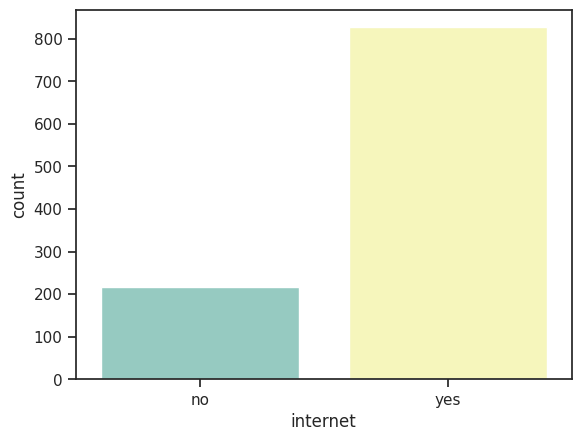

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

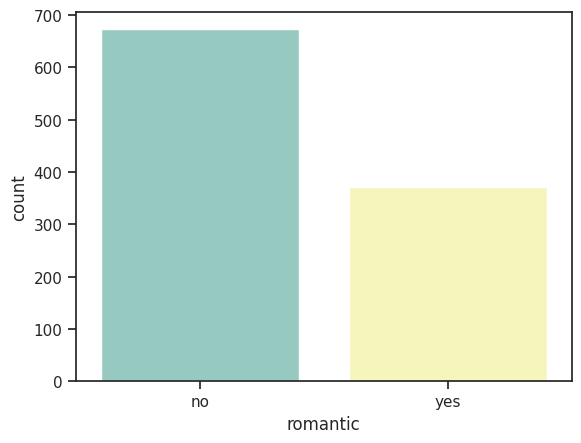

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

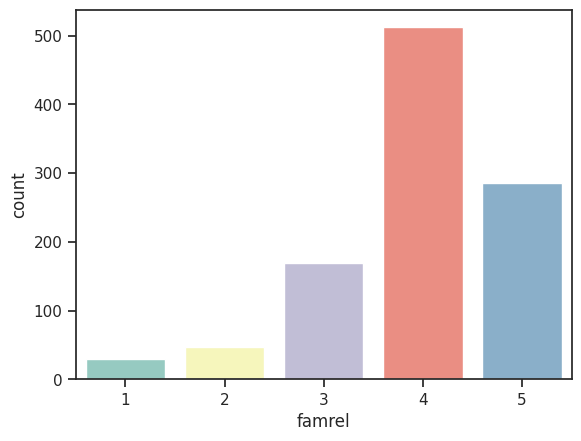

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

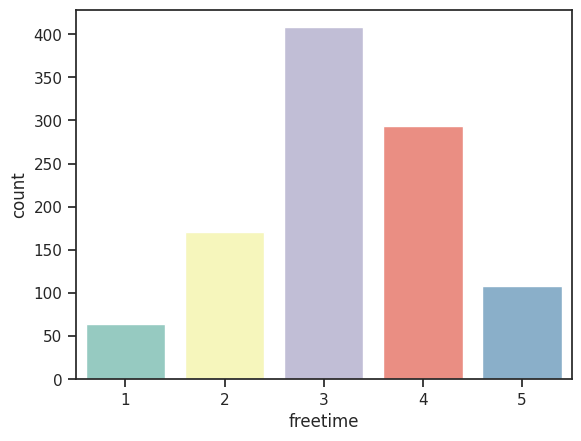

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

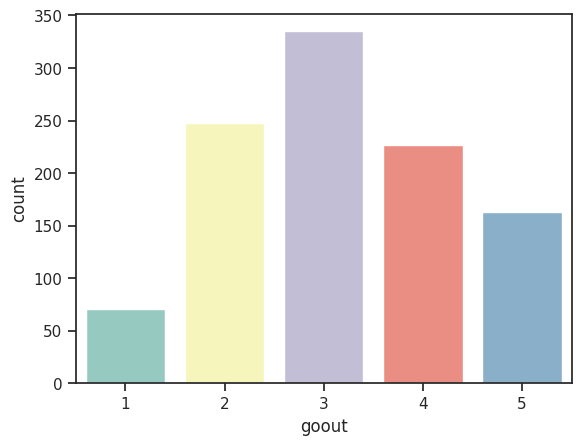

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

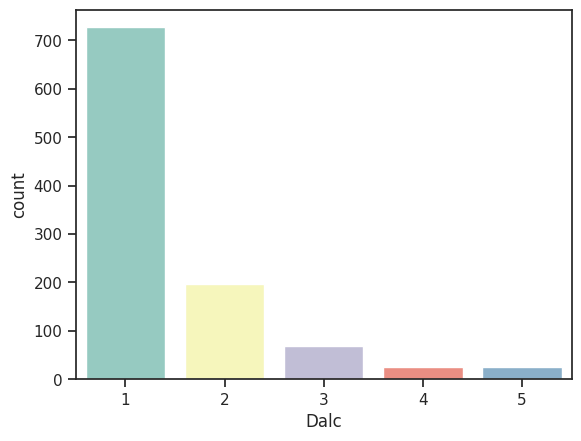

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

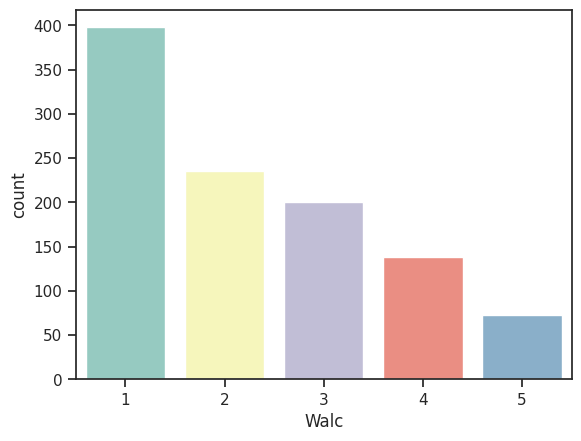

<ipython-input-117-ac964f87d405>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1,palette="Set3")


<Figure size 640x480 with 0 Axes>

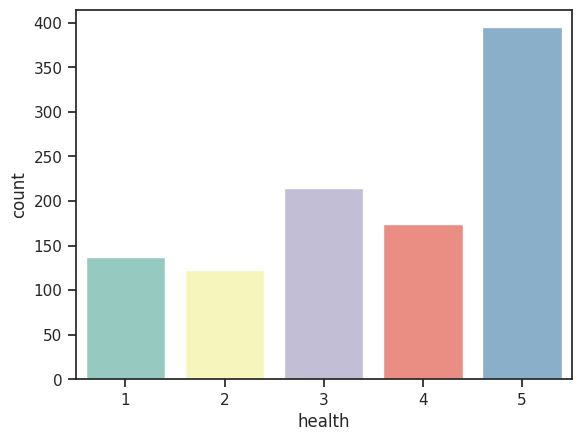

In [117]:
df1 = df.select_dtypes(exclude=['int64'])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x=col, data=df1,palette="Set3")
    plt.show()

## Distribution of Numerical Varriable

-------------------------------------------------

<ipython-input-118-5cc2ad0e1f71>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df1,palette="Set3",kde=True,bins=10)


<Figure size 640x480 with 0 Axes>

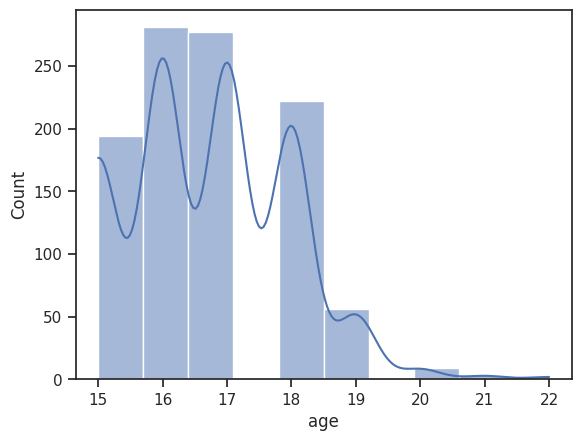

<ipython-input-118-5cc2ad0e1f71>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df1,palette="Set3",kde=True,bins=10)


<Figure size 640x480 with 0 Axes>

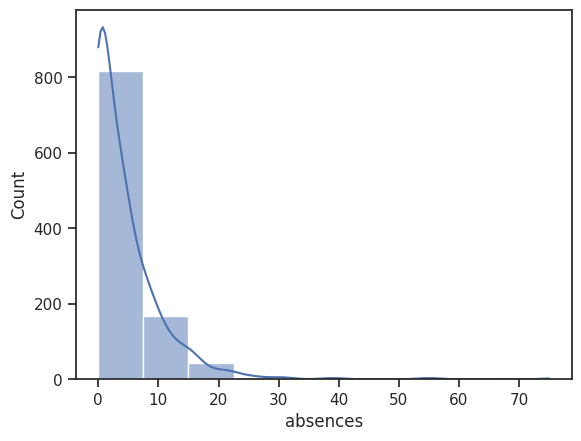

<ipython-input-118-5cc2ad0e1f71>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df1,palette="Set3",kde=True,bins=10)


<Figure size 640x480 with 0 Axes>

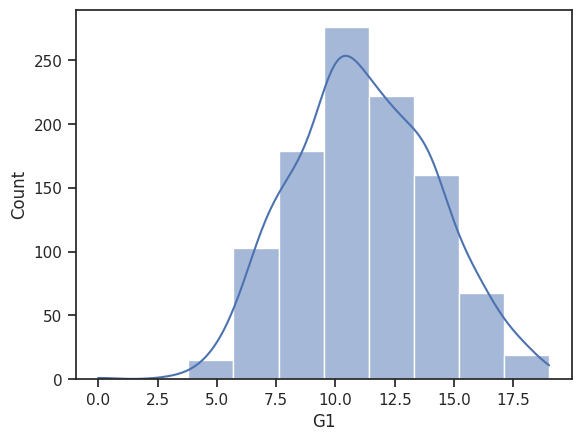

<ipython-input-118-5cc2ad0e1f71>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df1,palette="Set3",kde=True,bins=10)


<Figure size 640x480 with 0 Axes>

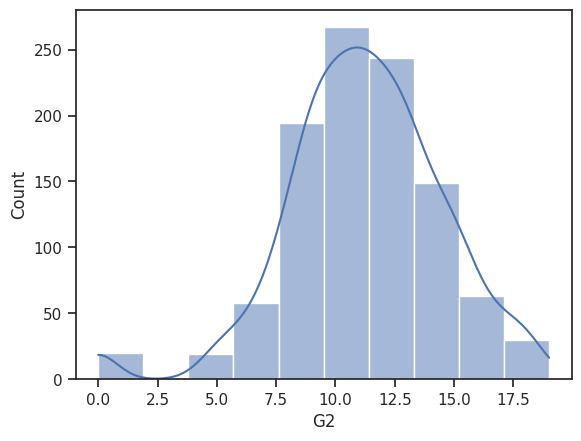

<ipython-input-118-5cc2ad0e1f71>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df1,palette="Set3",kde=True,bins=10)


<Figure size 640x480 with 0 Axes>

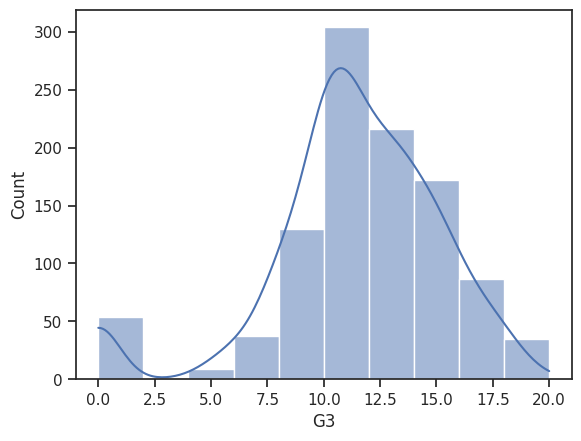

In [118]:
df1 = df.select_dtypes(include=['int64'])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    plt.figure() #this creates a new figure on which your plot will appear
    sns.histplot(x=col, data=df1,palette="Set3",kde=True,bins=10)
    plt.show()

# Bivarate Analysis

## Schoolsup with the Grades of the subject
(schoolsup : extra educational support (binary: yes or no))

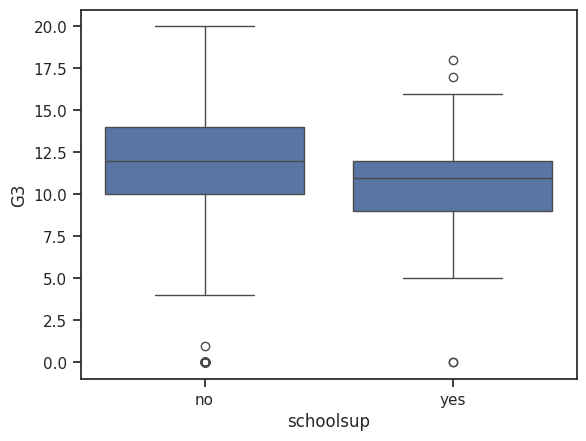

In [119]:
sns.boxplot(data=df, x="schoolsup", y="G3");

## Family Support with the grades of the subject
(family educational support (binary: yes or no))

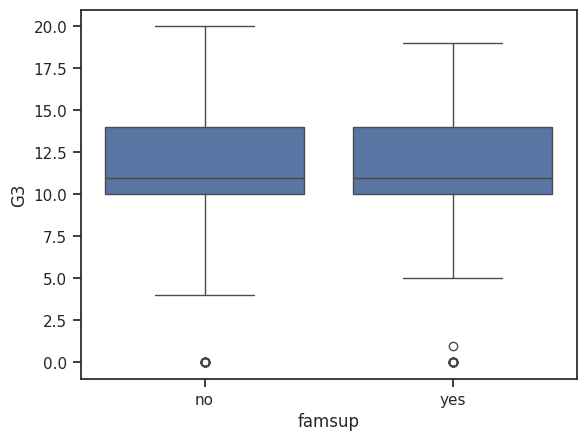

In [120]:
sns.boxplot(data=df, x="famsup", y="G3");

## Nursery class status with the grades of the subject
(attended nursery school (binary: yes or no))

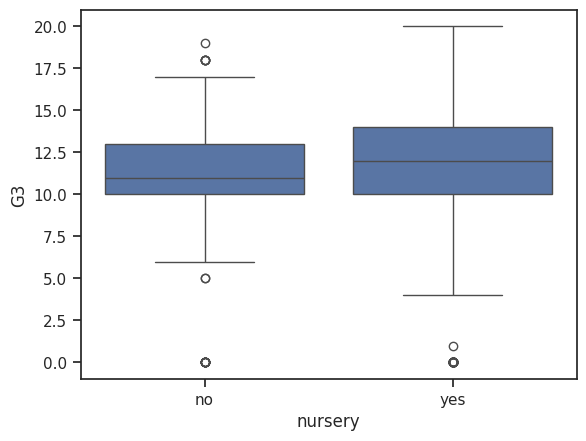

In [121]:
sns.boxplot(data=df, x="nursery", y="G3");

## Health with the grades of the subject
(current health status (numeric: from 1 : very bad to 5 : very good))

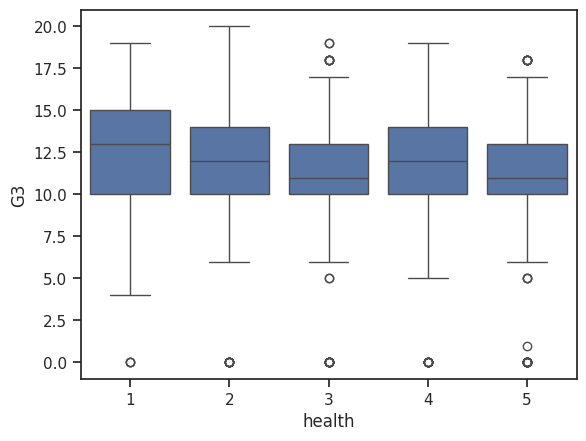

In [122]:
sns.boxplot(data=df, x="health", y="G3");

## Effect of famsize on students performance
(famsize : family size (binary: "LE3" : less or equal to 3 or "GT3" : greater than 3))

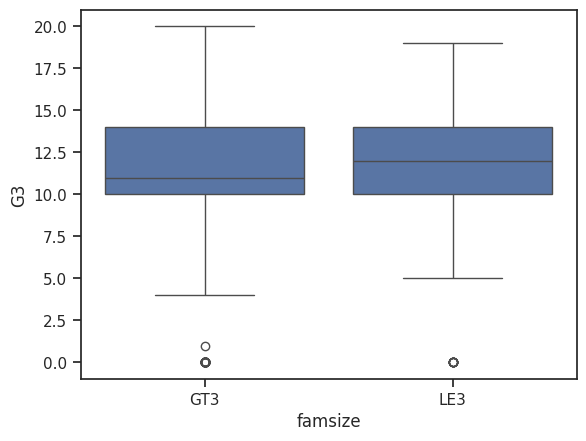

In [123]:
sns.boxplot(data=df, x="famsize", y="G3");

## Effect of Pstatus on students performance
(Pstatus : parent's cohabitation status (binary: "T" : living together or "A" : apart))

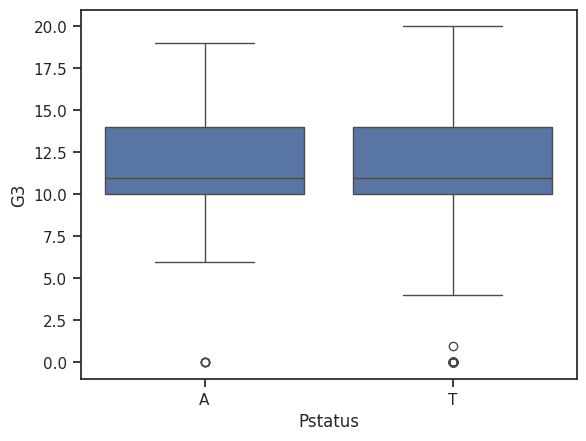

In [124]:
sns.boxplot(data=df, x="Pstatus", y="G3");

## Effect of Medu and Fedu on students performance
- Medu : mother's education (numeric: 0 : none, 1 : primary education (4th grade), 2 : 5th to 9th grade, 3 : secondary education or 4: higher education)
- Fedu : father's education (numeric: 0 : none, 1 : primary education (4th grade), 2 : 5th to 9th grade, 3 : secondary education or 4 : higher education)


<ipython-input-125-d3b60ce3664d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels( ('none', 'primary education (4th grade)','5th to 9th grade','secondary education','higher education'),rotation='vertical' )
<ipython-input-125-d3b60ce3664d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels( ('none', 'primary education (4th grade)','5th to 9th grade','secondary education','higher education'),rotation='vertical' )


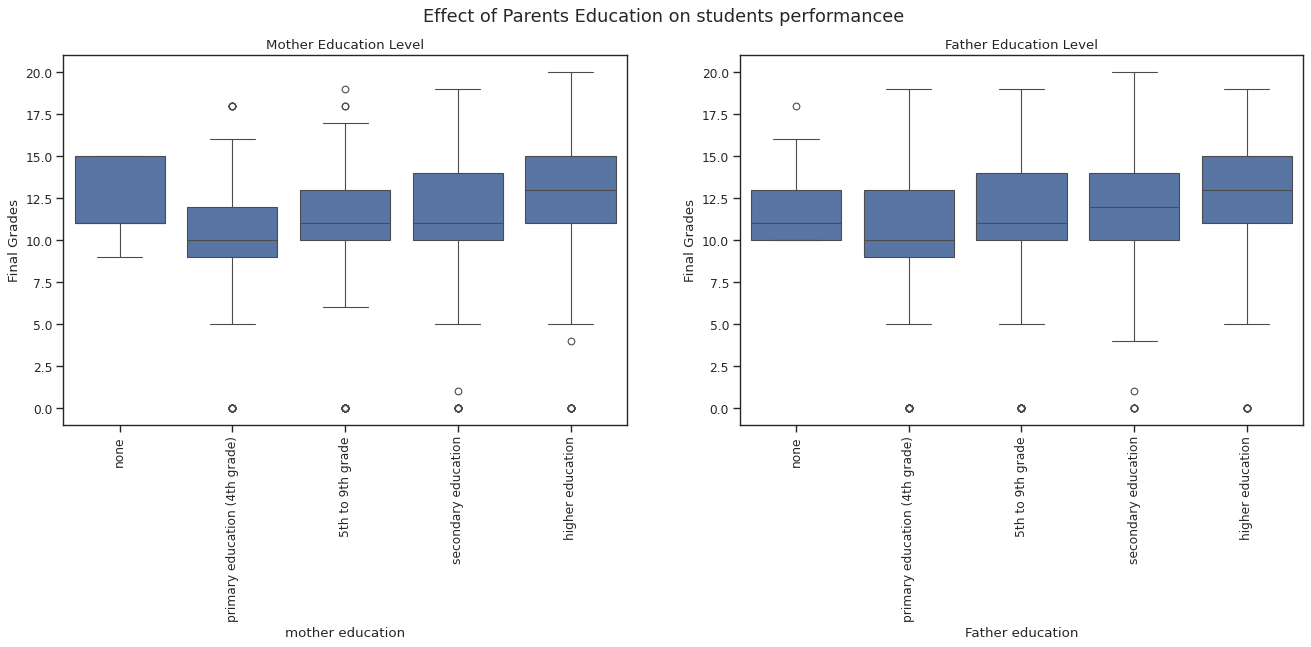

In [125]:
fig, ax =plt.subplots(1,2,figsize=(20,6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(data=df, x="Medu", y="G3", ax=ax[0]).set_title('Mother Education Level')
ax[0].set_xticklabels( ('none', 'primary education (4th grade)','5th to 9th grade','secondary education','higher education'),rotation='vertical' )
ax[0].set_xlabel('mother education')
ax[0].set_ylabel('Final Grades')
sns.boxplot(data=df, x="Fedu", y="G3", ax=ax[1]).set_title('Father Education Level')
ax[1].set_xticklabels( ('none', 'primary education (4th grade)','5th to 9th grade','secondary education','higher education'),rotation='vertical' )
ax[1].set_xlabel('Father education')
ax[1].set_ylabel('Final Grades')
fig.suptitle('Effect of Parents Education on students performancee', fontsize=16)
fig.show()

## Effect of Mother and Father Job on students performance
 - Mjob : mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

- Fjob : father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other"

<ipython-input-126-1e8cb61220d8>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels( ('teacher', 'health','services','at_home','other'),rotation='vertical' )
<ipython-input-126-1e8cb61220d8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels( ('teacher', 'health','services','at_home','other'),rotation='vertical' )


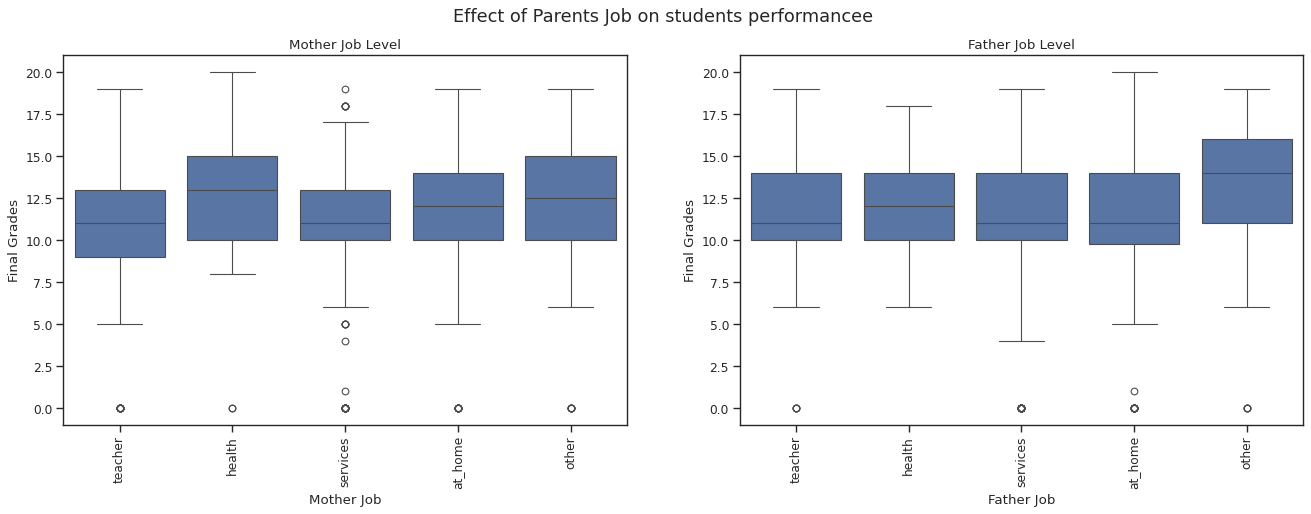

In [126]:
fig, ax =plt.subplots(1,2,figsize=(20,6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(data=df, x="Mjob", y="G3", ax=ax[0]).set_title('Mother Job Level')
ax[0].set_xticklabels( ('teacher', 'health','services','at_home','other'),rotation='vertical' )
ax[0].set_xlabel('Mother Job')
ax[0].set_ylabel('Final Grades')
sns.boxplot(data=df, x="Fjob", y="G3", ax=ax[1]).set_title('Father Job Level')
ax[1].set_xticklabels( ('teacher', 'health','services','at_home','other'),rotation='vertical' )
ax[1].set_xlabel('Father Job')
ax[1].set_ylabel('Final Grades')
fig.suptitle('Effect of Parents Job on students performancee', fontsize=16)
fig.show()

## Interrelationship Between Different Grading Scheme

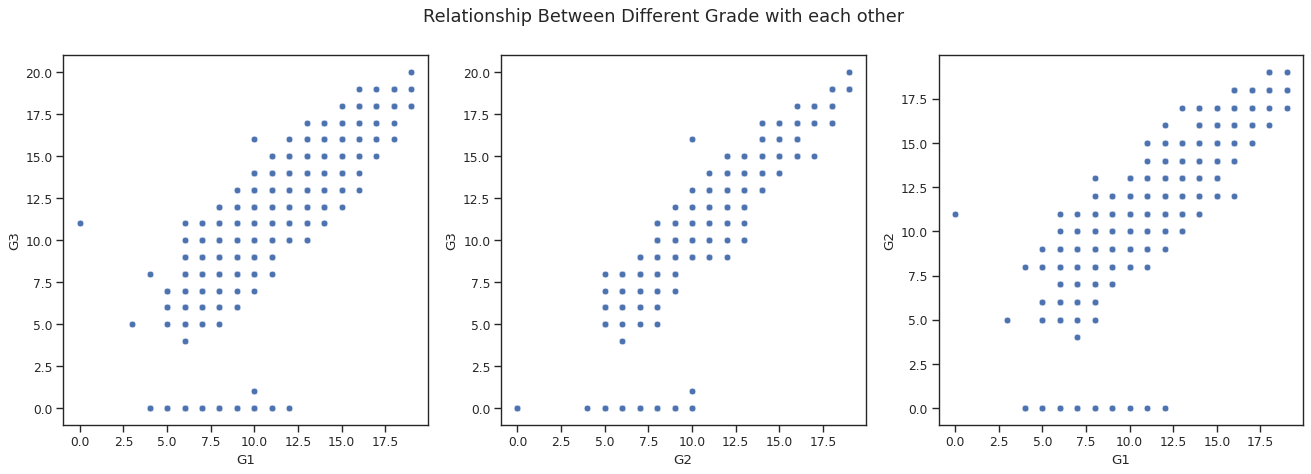

In [127]:
fig, ax =plt.subplots(1,3,figsize=(20,6), dpi=80, facecolor='w', edgecolor='k')
sns.scatterplot(data=df, x="G1", y="G3",ax=ax[0])
sns.scatterplot(data=df, x="G2", y="G3",ax=ax[1])
sns.scatterplot(data=df, x="G1", y="G2",ax=ax[2])
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
fig.suptitle('Relationship Between Different Grade with each other', fontsize=16)
fig.show()

In [128]:
sns.set_theme(style="ticks")

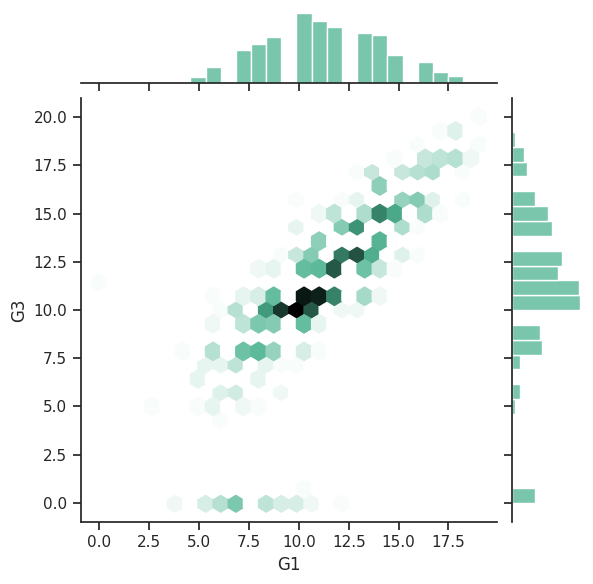

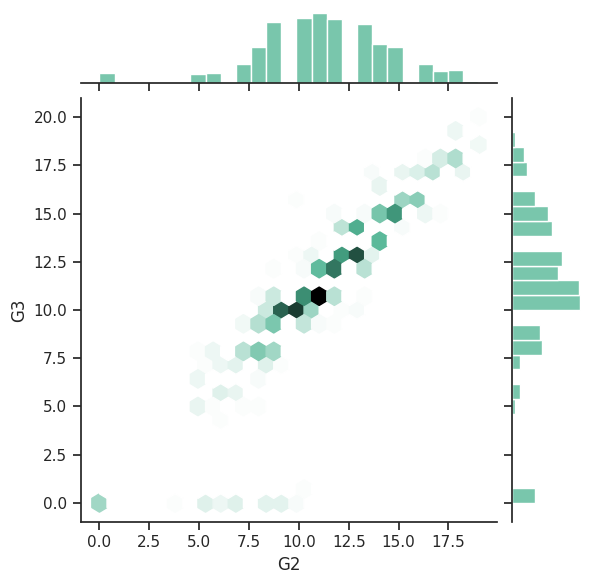

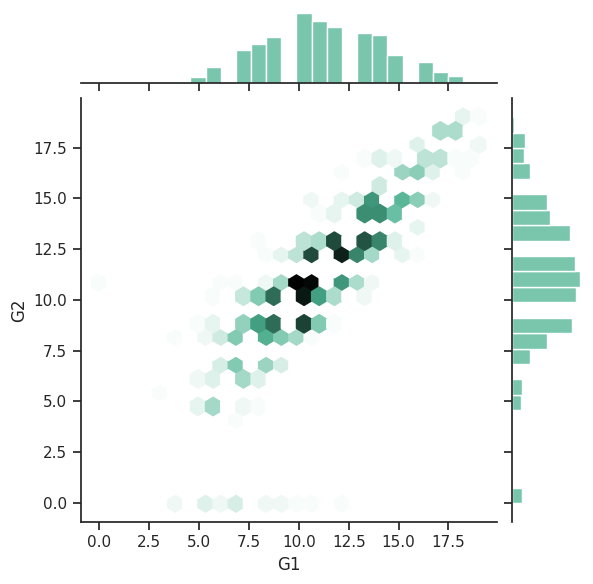

In [129]:
sns.jointplot(x=df['G1'], y=df['G3'], kind="hex", color="#4CB391")
sns.jointplot(x=df['G2'], y=df['G3'], kind="hex", color="#4CB391")
sns.jointplot(x=df['G1'], y=df['G2'], kind="hex", color="#4CB391")
fig.show()

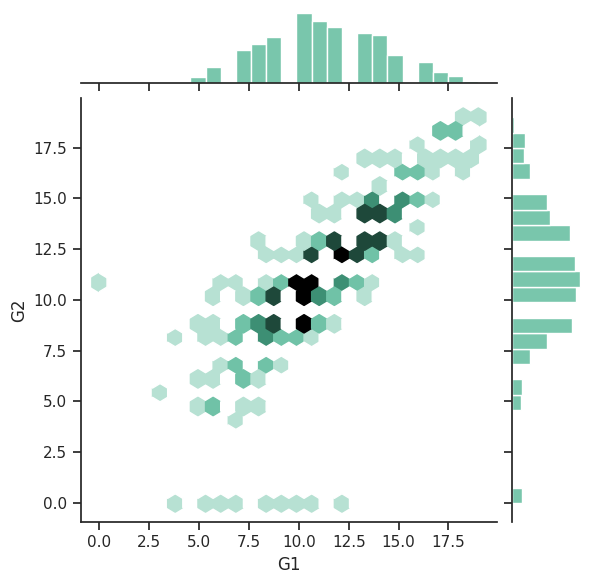

In [130]:
sns.jointplot(x=df['G1'], y=df['G2'], kind="hex", color="#4CB391",bins=6)

In [131]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

<Axes: xlabel='absences', ylabel='G3'>

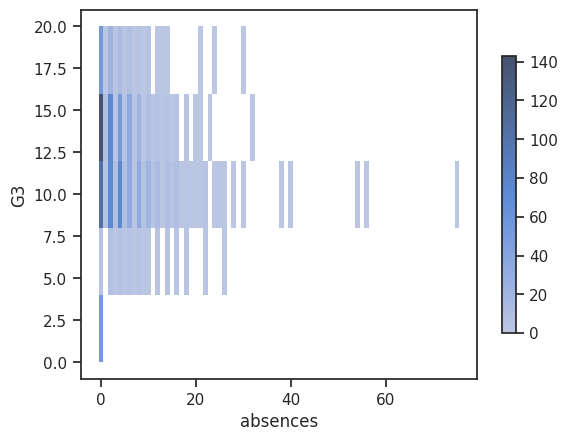

In [132]:
sns.histplot(
    df, x="absences", y="G3",
    bins=5, discrete=(True, False),
    cbar=True, cbar_kws=dict(shrink=.75)
)

<Axes: xlabel='G3', ylabel='Density'>

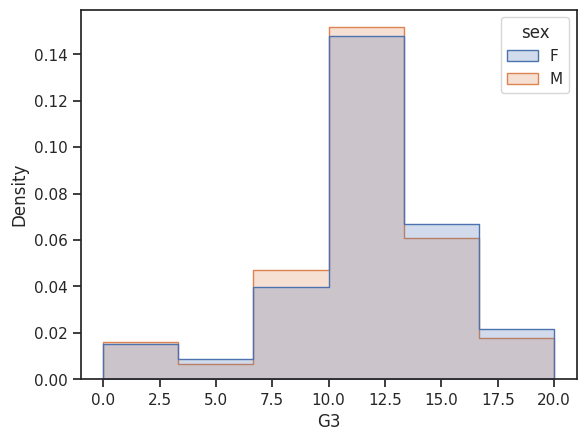

In [133]:
sns.histplot(
    df, x="G3", hue="sex", element="step",
    stat="density", common_norm=False,bins=6
)

<Axes: xlabel='G3', ylabel='Density'>

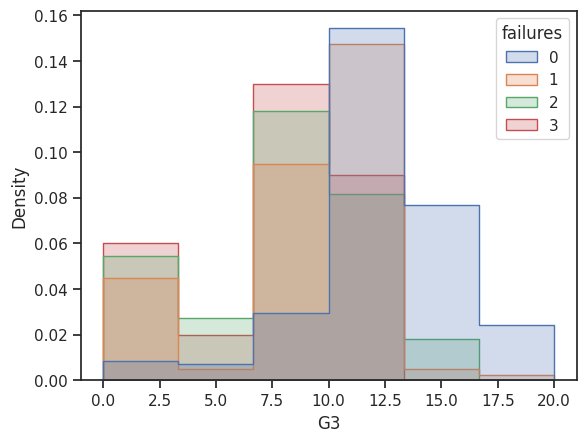

In [134]:
sns.histplot(
    df, x="G3", hue="failures", element="step",
    stat="density", common_norm=False,bins=6
)

<Axes: xlabel='G3', ylabel='Density'>

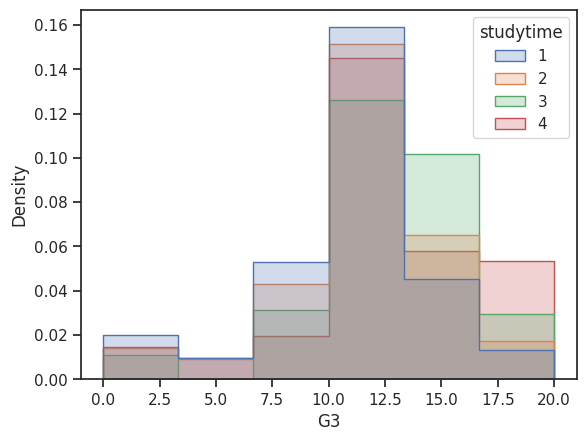

In [135]:
sns.histplot(
    df, x="G3", hue="studytime", element="step",
    stat="density", common_norm=False,bins=6
)


# Multivarate Analysis

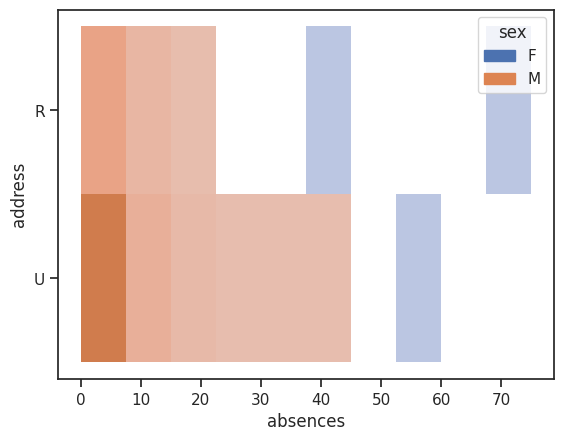

In [72]:
sns.histplot(
    df,x="absences", y="address", hue="sex", legend=True,bins=10
);

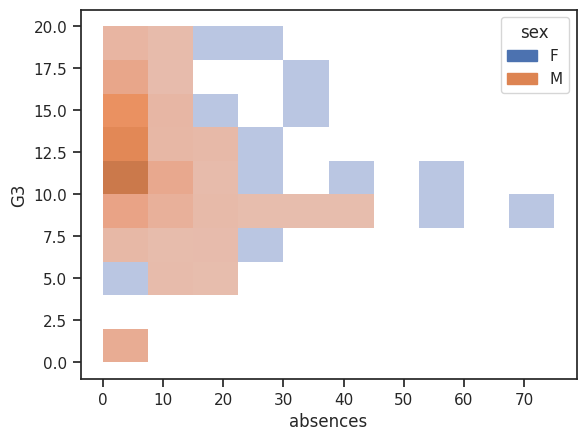

In [73]:
sns.histplot(
    df,x="absences", y="G3", hue="sex", legend=True,bins=10
);

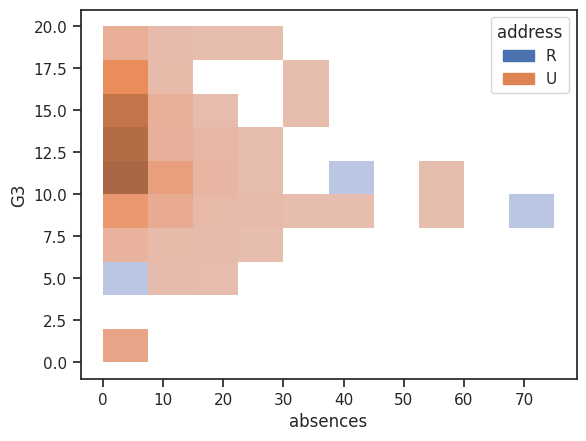

In [74]:
sns.histplot(
    df,x="absences", y="G3", hue="address", legend=True,bins=10
);

# Feature Engenering

# Outlier removal

In [78]:
result = df.select_dtypes(include='number')#selecting dtypes in dataset

for i in result.columns:
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)

    iqr = percentile75-percentile25

    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df[df[i] > upper_limit]
    df[df[i] < lower_limit]

    df_new = df[df[i] < upper_limit ]
    df_new = df[df[i] > lower_limit ]

<Axes: >

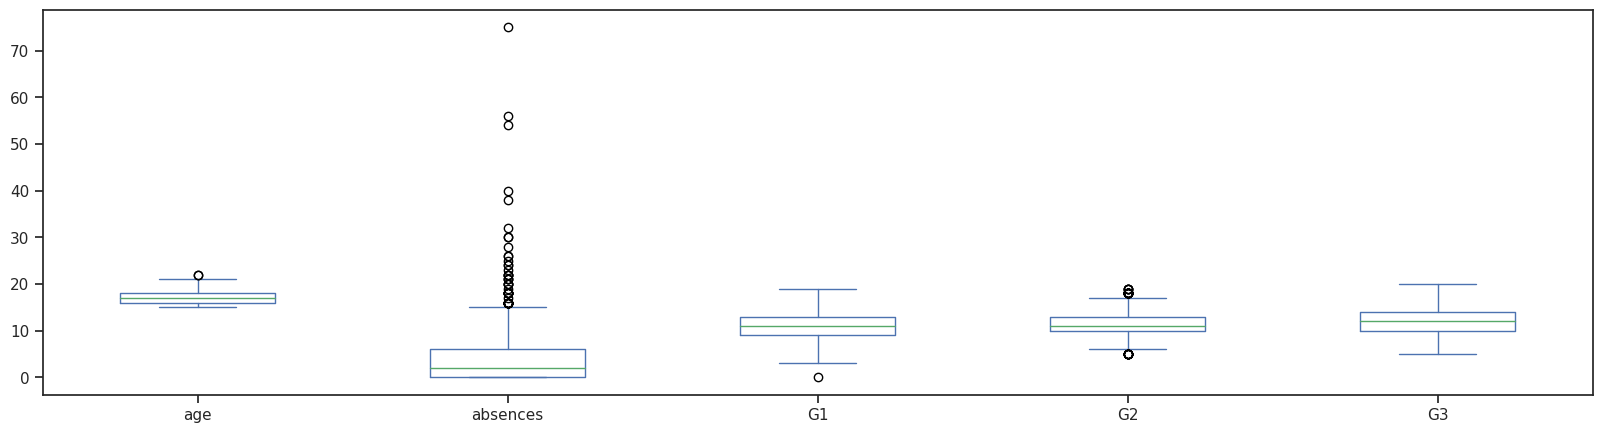

In [79]:
df_new.plot(kind='box',figsize=(20, 5))

## New datframe for Random Forest

In [80]:
df_rf=df_new.copy(deep=True)

# 1. Linear Regression Model

# Spliting Column in Train and Test set

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop(columns=['G1','G3','G2','absences']),
                                                    df_new['G3'],
                                                    test_size=.2,
                                                    random_state=10)

#Further Divide dataframe into numerical and categorical type of train dataset

In [82]:
# Define categorical columns
categorical = list(X_train.select_dtypes('category').columns)
print(f"Categorical columns are: {categorical}")

# Define numerical columns
numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
Numerical columns are: ['age']


# One Hot enconding of cat dataset

In [83]:
cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Scaling of numerical dataset

In [84]:
from sklearn.preprocessing import Normalizer

In [85]:
num_pipe = Pipeline([('scaler', Normalizer())])

# Combining of both categorical and numerical pipeline

In [86]:
# Combine categorical and numerical pipelines
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, categorical),
    ('num', num_pipe, numerical)
])

# Fixing Pipeline on Linner regression

In [87]:
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Medu',
                                                   'Fedu', 'Mjob', 'Fjob',
                                                   'reason', 'guardian',
                                                   'traveltime', 'studytime',
                                                   'failures', 'schoolsup',
                                                   'famsup', 'paid',
                                                   'activities', 'nursery',
                                                   'higher', 'internet',
                                                   'romantic', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   Normalizer())]),
                                                  ['age'])])),
                ('model', LinearRegression())])

# Predict training data

In [88]:
y_train_pred = pipe.predict(X_train)
print(f"Predictions on training data: {y_train_pred}")

Predictions on training data: [11.375  11.8125 12.5    12.6875 11.5625  8.75   14.4375 10.1875 14.875
 11.5    13.5    11.875  12.8125 12.     14.3125 12.5     9.6875 11.375
 12.125  12.625  11.75   10.3125 14.     12.8125 13.8125 13.      9.1875
 11.3125  8.8125  9.     10.6875 11.     13.875  11.625  10.625  14.625
 12.75   13.5    13.3125 10.625  13.625  10.5625 11.875  13.     13.
 11.5625  9.0625 12.375   6.8125 14.375  11.375   9.6875 12.8125 11.875
  8.4375 14.375  14.625  13.375  10.625  14.625  10.5    13.625  10.125
 11.5625 13.75   12.875  12.125  12.875  14.5    10.     10.3125 11.4375
  9.5625  9.     13.9375 12.75   10.125  11.25    8.375  12.625  11.
 11.1875 10.125  12.25   12.9375  8.375  10.875  14.     15.0625 11.9375
 12.75   10.25   13.75   12.     14.     12.875  15.5625 10.0625  8.0625
 15.     15.3125 12.75   13.75   12.375  13.0625 11.0625 15.75   12.625
 11.9375 10.25   13.5625 13.25   11.75   13.375  10.1875 11.1875 12.375
 11.1875 13.8125 14.     11.6875 12.

#Predict test data

In [91]:
y_test_pred = pipe.predict(X_test)
print(f"Predictions on test data: {y_test_pred}")

Predictions on test data: [11.9375 12.5    14.3125 14.3125 14.625  11.875  13.6875 10.375  13.8125
 16.375  10.125  12.75   13.5    12.875  13.0625 11.875  13.6875 10.875
 12.75   11.375  12.75    8.75   13.0625 13.9375 14.625   9.75   11.8125
 12.6875 12.875  13.875  12.75   12.     11.125   8.9375 10.5    10.375
 10.8125 10.625  14.875  12.5    12.625  12.875  10.25   11.4375 12.5
 14.6875 13.8125  8.1875 12.3125 10.125  14.5    13.6875  8.25   13.9375
 14.9375 11.0625 11.     12.25   14.8125 13.5625 12.75   13.1875 13.5
 12.     11.25   14.     11.0625 10.375  10.5625 12.75   10.875  13.4375
 13.4375 12.5625 10.5625  9.125  12.5625 12.875  11.5    12.3125  9.125
 12.75   10.125  10.375  13.0625 14.4375 11.1875 11.5    12.6875 14.6875
 12.875  11.25   13.5625  9.8125 12.75   11.125  14.25   14.25   11.75
 12.375   8.8125 13.     12.5    10.75   14.125  11.5625 13.3125 12.5
 12.25   13.     11.875  13.625  12.5    10.25   12.9375 11.625  11.0625
 12.5    12.375  12.75   12.6875 10.187

#Check r square value

In [92]:
r2 = r2_score(y_test, y_test_pred)
print('r2 score for a  model is', r2)

r2 score for a  model is 0.18645408928936347


# 2. Fitting Random Forest

# Spliting dataset in Train and Test set

In [93]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(df_rf.drop(columns=['G1','G3','G2', 'address',
                                                                                'famsize', 'guardian', 'traveltime','absences','romantic']),
                                                    df_rf['G3'],
                                                    test_size=.2,
                                                    random_state=10)

# Define categorical columns

In [94]:
categorical_n = list(X_train_n.select_dtypes('category').columns)
print(f"Categorical columns are: {categorical_n}")

Categorical columns are: ['school', 'sex', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']


# Define numerical columns

In [95]:
numerical_n = list(X_train_n.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical_n}")

Numerical columns are: ['age']


# OHE encoding

In [96]:
cat_pipe_n = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Normalization

In [97]:
num_pipe_n = Pipeline([('scaler', Normalizer())])

#Combine categorical and numerical pipelines

In [98]:
preprocessor_n = ColumnTransformer([
    ('cat', cat_pipe_n, categorical_n),
    ('num', num_pipe_n, numerical_n)
])

# Fit a pipeline with transformers and an estimator to the training data

In [99]:
pipe_n = Pipeline([
    ('preprocessor', preprocessor_n),
    ('model', RandomForestRegressor(max_depth=10, random_state=8))])
pipe_n.fit(X_train_n, y_train_n)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['school', 'sex', 'Pstatus',
                                                   'Medu', 'Fedu', 'Mjob',
                                                   'Fjob', 'reason',
                                                   'studytime', 'failures',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   Normalizer())]),
                                                  ['age'])])),
                ('model', RandomForestRegressor(max_depth=10, random_state=8))])

# Predict training data

In [100]:
y_train_pred_n = pipe_n.predict(X_train_n)
print(f"Predictions on training data: {y_train_pred_n}")

Predictions on training data: [11.44844442 12.16866218 12.3420182  12.93995774 10.99796344 11.04163345
 14.09874619  9.76070324 14.55417281 11.96607762 12.547614   11.02500301
 13.27098187 11.0857898  14.97112435 12.84551826 11.6567909  11.91279278
 10.37753733 11.5646508  11.44402564 10.9279058  12.28455033 12.84575118
 12.94740878 13.14159128  8.94143666  9.49830952  9.19117982  8.52272159
 11.76688513  8.85880016 14.0670276  13.30128102  9.14173351 14.20085097
 13.63533876 11.17499363 14.7574938  11.44734993 12.21202    10.12655786
 12.26094055 13.30103164 12.51942045 12.35997513  9.50602937 11.8852619
  7.76947803 14.70611332  9.12566756  8.27342885 12.79876866 11.56595207
  8.54253996 14.11741437 14.78788117 14.3531602  12.11029094 15.69104125
 10.36852749 10.36075989  8.24117688 12.34577824 13.93697299 11.74644434
 10.47334099 10.12844838 14.51983132  6.71217172 12.48743399 12.7105752
 11.41250669 10.24281644 12.09880939 11.42226789  8.24117688 11.79021941
  7.11945238 11.9981476

# Predict test data

In [101]:
y_test_pred_n = pipe_n.predict(X_test_n)
print(f"Predictions on test data: {y_test_pred_n}")

Predictions on test data: [10.90870297 12.3420182  14.51370479 13.82173465 15.64320394  9.91212771
 12.81568396 10.07305675 13.59630385 13.53363054 11.07353207 13.06950638
 13.11528589 13.86613376 11.81279626 12.33886596 13.15173103  8.90437474
 13.32775687 11.6883474  12.5893661   9.89536546 12.63318293 13.85851754
 14.23610143  9.1649641  11.91538736 12.80420659 12.08816587 12.85001575
 10.62324486 12.2808339  11.4760078  10.7474878  11.86202767 11.75387311
  9.37844102 10.89690941 14.72665504 13.69485743 12.52515668 11.31133958
  9.90846126 12.40869514 12.92371773 13.2470388  13.13834475  6.60090909
 13.00035503 10.25117857 13.72804685 12.95702431  9.11855123 12.86346247
 15.21197115 11.67251276 11.5580125  12.8122281  13.99498383 14.63337846
 13.57437164 15.06371564 12.9142178  12.14663972 13.67462144 13.88813407
 12.50461981 10.50973784 12.2553106  12.32683908  9.33101218 14.27495727
 12.16006806 11.89465855 10.12655786  9.80640922 12.99266243 11.13064124
 10.76606627 12.78873319 

# Check r square value of Random Forest

In [102]:
r2_n = r2_score(y_test_n, y_test_pred_n)
print('r2_n score for a  model is', r2_n)

r2_n score for a  model is 0.38558625554194637


## Inference

--------------------------

- Random forest is performing better as compare to linner regression.
- r2 score is too less for making prediction
- G1 and G2 high correlated with Target - using any one one them lead to increase in beterment of model.